*How does one learn?*

- Can you give an example?

### What is machine learning?

- We train a computer on some examples and see how it does on new tasks.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Regression

In [4]:
ads = pd.read_csv('static/ads.csv', index_col = 0)

In [5]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


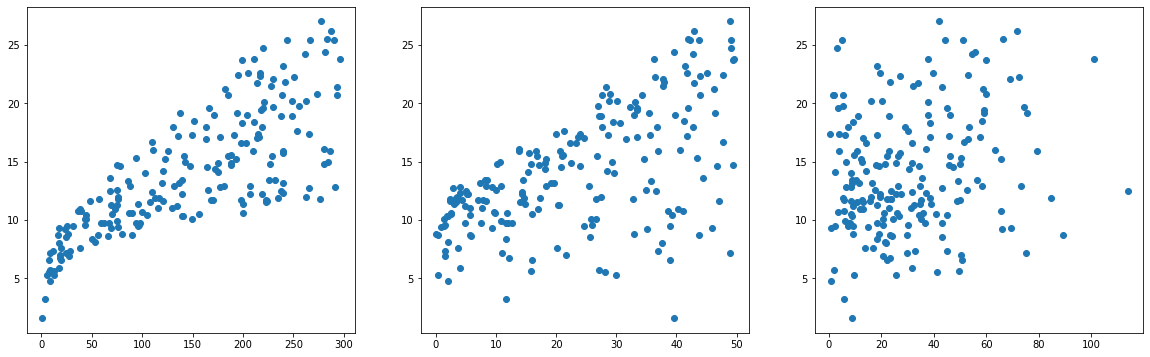

In [9]:
#problem -- review 
#make 3 side by side scatterplots of tv, radio, news on x
# and sales on y
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (20, 6))
ax[0].scatter(ads['TV'], ads['sales'])
ax[1].scatter(ads['radio'], ads['sales'])
ax[2].scatter(ads['newspaper'], ads['sales'])

- Train/test split x
- Instantiate x
- Fit (on the training data) x
- Predict (on the test data) x
- Evaluate

In [10]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(ads[['TV']], ads['sales'])

lr = LinearRegression()

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

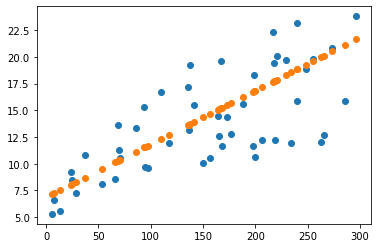

In [28]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predictions)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_test, predictions)

11.645654315857064

In [31]:
np.sqrt(mean_squared_error(y_test, predictions))

3.412572975902063

In [32]:
#build model on radio and determine rmse

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ads[['TV', 'radio']], ads['sales'])
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

1.4944152654488925

In [35]:
lr.coef_

array([0.04517238, 0.18849825])

In [36]:
lr.intercept_

3.030985228568399

### Classification

In [37]:
titanic = sns.load_dataset('titanic')

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [41]:
X_train, X_test, y_train, y_test = train_test_split(titanic[['pclass']], titanic['survived'])
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [42]:
knn.score(X_test, y_test)

0.6636771300448431

In [51]:
X_train, X_test, y_train, y_test = train_test_split(titanic[['pclass', 'fare', 'adult_male']], titanic['survived'])
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [52]:
knn.score(X_test, y_test)

0.757847533632287